In [8]:
from utils import get_model_and_hyperparams
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [9]:
vae, params = get_model_and_hyperparams("xxxs1")

#### See how decoded patches look like when varying symbol value at a specific position

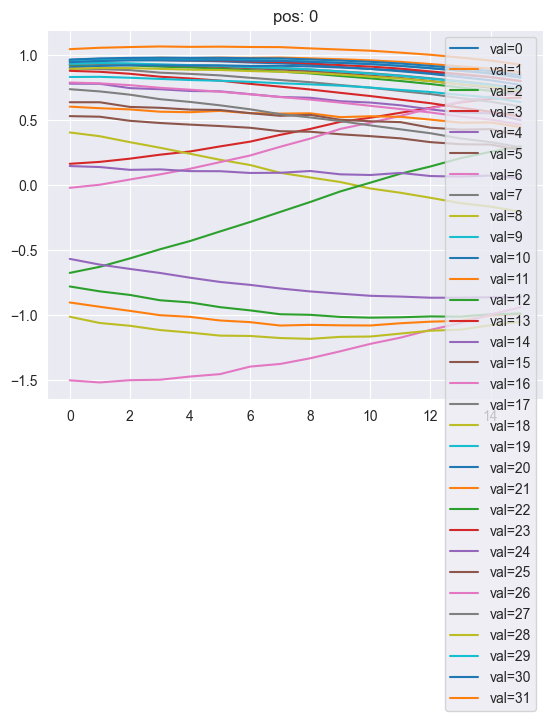

In [10]:
for i in range(params.n_latent):    # iterate over positions in encoding
    plt.figure()
    for j in range(params.alphabet_size):   # iterate over possible values for position
        enc = torch.zeros(params.n_latent, dtype=torch.int64)
        enc[i] = j
        z = torch.unsqueeze(F.one_hot(enc, num_classes=params.alphabet_size), 0)    # z.shape: (1, n_latent, alphabet_size)
        output = vae.decoder(z.float())
        plt.plot(output.detach().numpy().squeeze(), label=f'val={j}')
    
    plt.title(f'pos: {i}')
    plt.legend()
    plt.show()

tensor([22])
tensor([25])
tensor([23])
tensor([22])
tensor([14])
tensor([29])
tensor([0])
tensor([6])
tensor([5])
tensor([4])
tensor([21])
tensor([9])
tensor([30])
tensor([30])
tensor([30])
tensor([3])
tensor([26])
tensor([11])
tensor([15])
tensor([6])


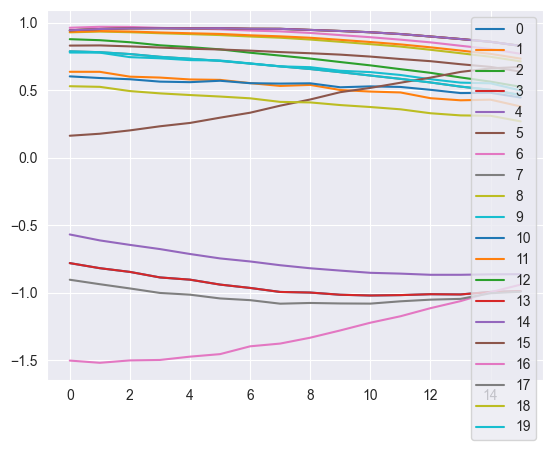

In [11]:
# generate random

for i in range(20):
    enc = torch.randint(0, params.alphabet_size-1, (params.n_latent,))
    print(enc)
    z = torch.unsqueeze(F.one_hot(enc, num_classes=params.alphabet_size), 0)    # z.shape: (1, n_latent, alphabet_size)
    output = vae.decoder(z.float())
    plt.plot(output.detach().numpy().squeeze(), label=i)

plt.legend()